# Customer Purchase Prediction using Decision Trees

**Predicting buying behavior from a synthetic but realistic dataset:**
- Defining the problem statement
- Collecting or importing the data
- Exploring the dataset and handling the errors in data
- Exploratory data analysis
- Feature engineering
- Modeling
- Testing

## 1. Defining the problem statement

We need to analyze what sort of people were likely to purchase a product.

In addition, we need to use decision tree algorithm in order to predict which individuals are going to puchased based their data.

## 2. Data collection

This dataset is generated by ChatGPT (GPT-5) in order to perform machine learning to tools to predict customer behavior.

Lets import the data.

In [1]:
# Importing  required library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('customer_purchase_dataset.csv')
df.head()

,Customer_ID,Gender,Age,Income,Car_Type,Marital_Status,Has_Children,Education,Credit_Score,Purchased
0,CUST14792,Female,NaN,46207.0,Sedan,Married,No,Bachelor,655.0,Yes
1,CUST13238,Female,NaN,57772.0,Truck,Married,Yes,Bachelor,630.0,No
2,CUST12833,Female,NaN,26054.0,Luxury,Single,No,Master,516.0,No
3,CUST13048,Male,NaN,58508.0,Hatchback,Single,Yes,Master,667.0,No
4,CUST13309,Male,NaN,35518.0,SUV,Divorced,No,Master,661.0,No


## 3. Exploring the dataset and handling the errors in data

In [3]:
df.shape

(5037, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5037 entries, 0 to 5036
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_ID     5037 non-null   object 
 1   Gender          5037 non-null   object 
 2   Age             5025 non-null   float64
 3   Income          5030 non-null   float64
 4   Car_Type        5037 non-null   object 
 5   Marital_Status  5037 non-null   object 
 6   Has_Children    5037 non-null   object 
 7   Education       5037 non-null   object 
 8   Credit_Score    5015 non-null   float64
 9   Purchased       5037 non-null   object 
dtypes: float64(3), object(7)
memory usage: 393.6+ KB


In [5]:
# Finding the numbers of duplicated rows
df.duplicated().sum()

37

In [6]:
# Dropping the duplicates 
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(5000, 10)

In [8]:
# Checking the numbe rof null values
df.isna().sum()

Customer_ID        0
Gender             0
Age               12
Income             7
Car_Type           0
Marital_Status     0
Has_Children       0
Education          0
Credit_Score      22
Purchased          0
dtype: int64

### Check which rows are null

In [9]:
df[df['Age'].isna()].index #null age index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [10]:
null_age = df.loc[df['Age'].isna(), ['Age', 'Purchased']]
null_age

,Age,Purchased
0,NaN,Yes
1,NaN,No
2,NaN,No
3,NaN,No
4,NaN,No
5,NaN,No
6,NaN,Yes
7,NaN,Yes
8,NaN,No
9,NaN,Yes


In [11]:
df[df['Income'].isna()].index

Int64Index([1260, 1376, 1516, 2706, 3186, 3767, 4085], dtype='int64')

In [12]:
null_income = df.loc[df['Income'].isna(), ['Income', 'Purchased']]
null_income

,Income,Purchased
1260,NaN,No
1376,NaN,Yes
1516,NaN,No
2706,NaN,Yes
3186,NaN,Yes
3767,NaN,No
4085,NaN,Yes


In [13]:
df[df['Credit_Score'].isna()].index

Int64Index([  64,  173,  588,  809, 1287, 1363, 1585, 1614, 1951, 2121, 2150,
            2353, 2450, 2776, 2868, 3098, 3183, 3346, 4350, 4569, 4616, 4664],
           dtype='int64')

In [14]:
null_credit = df.loc[df['Credit_Score'].isna(), ['Credit_Score', 'Purchased']]
null_credit

,Credit_Score,Purchased
64,NaN,No
173,NaN,No
588,NaN,Yes
809,NaN,No
1287,NaN,Yes
1363,NaN,No
1585,NaN,Yes
1614,NaN,Yes
1951,NaN,No
2121,NaN,No


# Viz

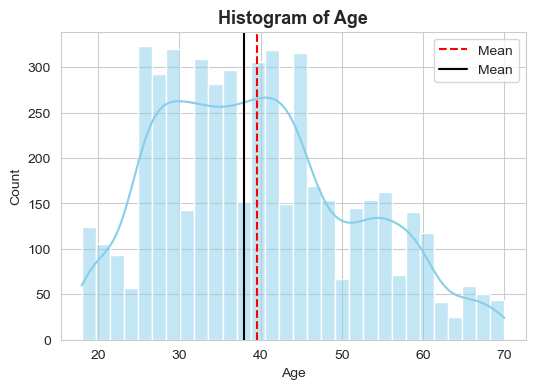

In [15]:
# Age feature

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Age', bins=30, kde=True, color='skyblue')
plt.axvline(df.Age.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df.Age.median(), color='black', label='Mean')
plt.title('Histogram of Age', fontsize=13, fontweight='bold')
plt.legend()
plt.show()

As the median is lower than the mean, the missing values should be filled with the median value.

In [16]:
# Filling the missing values with Median.
#df['Age'].fillna(df.Age.median(), inplace=True)

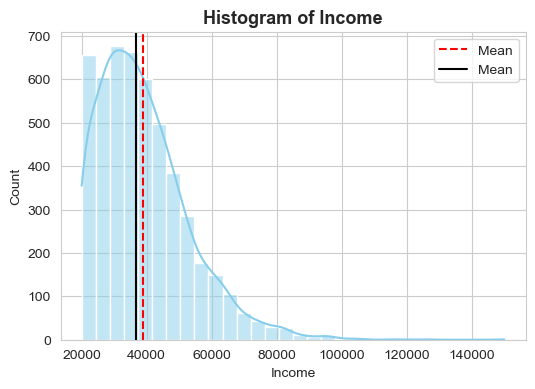

In [17]:
# Income feature

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Income', bins=30, kde=True, color='skyblue')
plt.axvline(df.Income.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df.Income.median(), color='black', label='Mean')
plt.title('Histogram of Income', fontsize=13, fontweight='bold')
plt.legend()
plt.show()

As the median is lower than the mean, the missing values should be filled with the median value.

In [18]:
# Filling the missing values with Median.
#df['Income'].fillna(df.Income.median(), inplace=True)

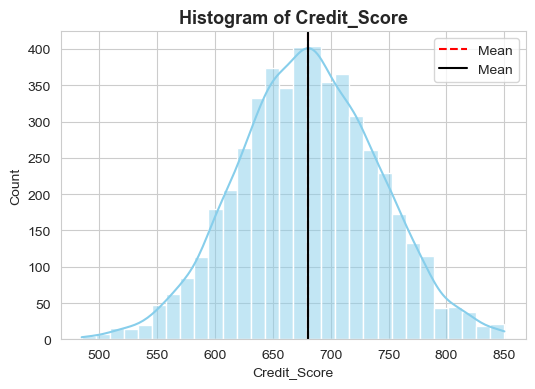

In [19]:
# Credit_Score feature

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Credit_Score', bins=30, kde=True, color='skyblue')
plt.axvline(df.Credit_Score.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df.Credit_Score.median(), color='black', label='Mean')
plt.title('Histogram of Credit_Score', fontsize=13, fontweight='bold')
plt.legend()
plt.show()

As the median and mean are almost same, missing values can be filled with either of them. Lets use the median value.

In [20]:
# Filling the missing values with Median.
#df['Credit_Score'].fillna(df.Credit_Score.median(), inplace=True)

⭐ **Conclution:**
- Initially, there were 5037 values and 10 features in this dataset.
- There were 37 duplicated rows, which were dropped.
- There were 41 missing values, which were filled with their median value.
- Final number of values is 5000, with no missing value.

## 4. Exploratory data analysis

In [21]:
# Value count of purchase column
df['Purchased'].value_counts()

Yes    3013
No     1987
Name: Purchased, dtype: int64

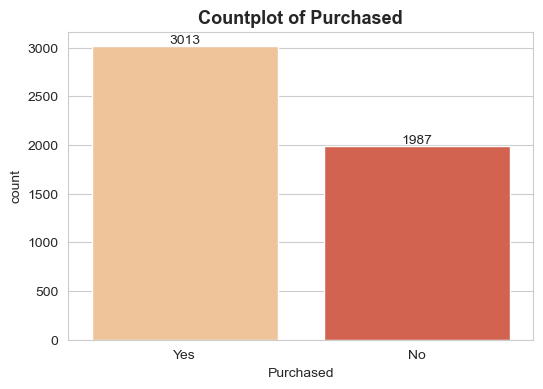

In [22]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='Purchased', palette='OrRd')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Countplot of Purchased', fontsize=13, fontweight='bold')
plt.show()

In [23]:
print(f'Percentage of Yes: {round(3013/(3013+1987) * 100, 2)}%')
print(f'Percentage of No: {round(1987/(3013+1987) * 100, 2)}%')

Percentage of Yes: 60.26%
Percentage of No: 39.74%


⭐ **Conclution:**
- 2235 (60.26%) people purchased and  2765 (55.3%) people did not purchased.
- This is not a strongly imbalanced dataset and no need for oversampling.

In [24]:
# Function to plot countplot
def feature_count_plot(feature: str, palette = 'Accent'):
    plt.figure(figsize=(16, 6))

    plt.subplot(121)
    ax = sns.countplot(data=df, x=feature, palette=palette)

    for container in ax.containers:
        ax.bar_label(container, fontsize=10)
    
    plt.title(f'Count of {feature}', fontsize=13, fontweight='bold')
    

    plt.subplot(122)
    bx = sns.countplot(data=df, x=feature, palette=palette, hue='Purchased')

    for container in bx.containers:
        bx.bar_label(container, fontsize=10)
    
    plt.title(f'Count of {feature} by Purchased', fontsize=13, fontweight='bold')

    plt.show()

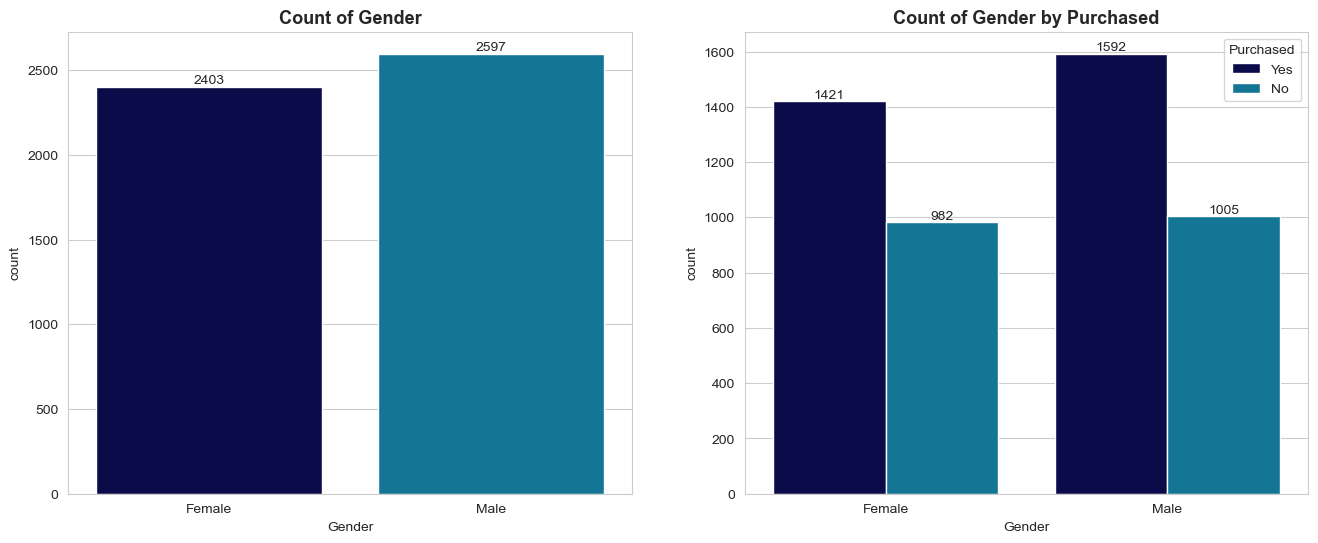

In [25]:
# Gender Feature

feature_count_plot('Gender', 'ocean')

⭐ **Conclution:**
- Gender has no influence in Purchase outcome.

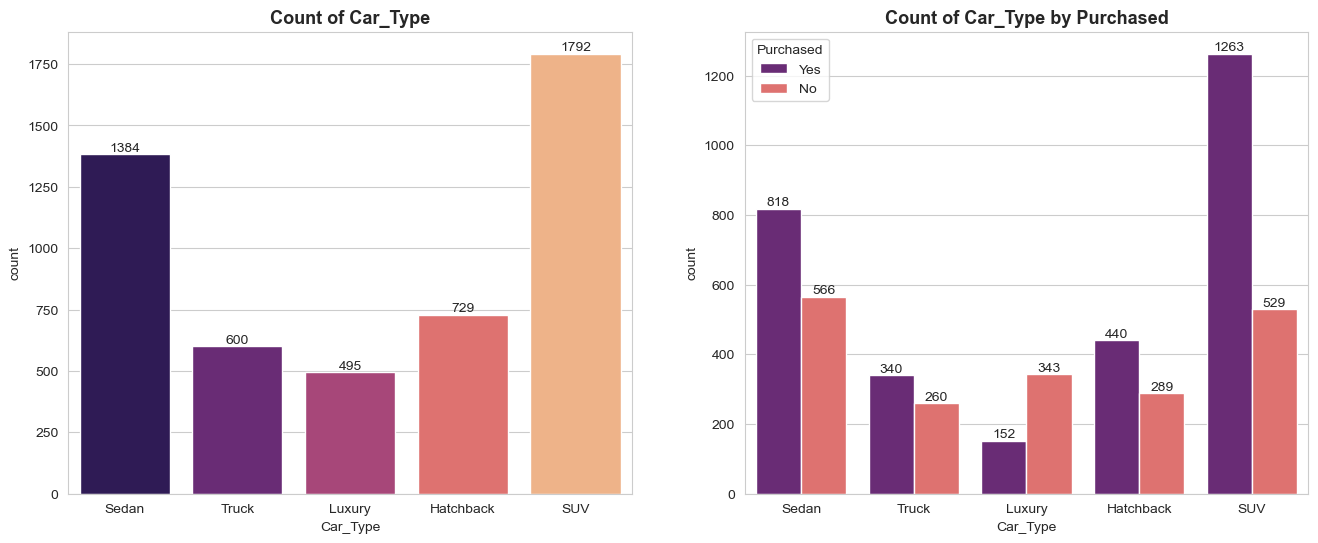

In [26]:
# Car_Type Feature

feature_count_plot('Car_Type', 'magma')

⭐ **Conclution:**
- Car_Type has influence in Purchase outcome.
- Suv and Sedan has purchsed more compare to other car types.

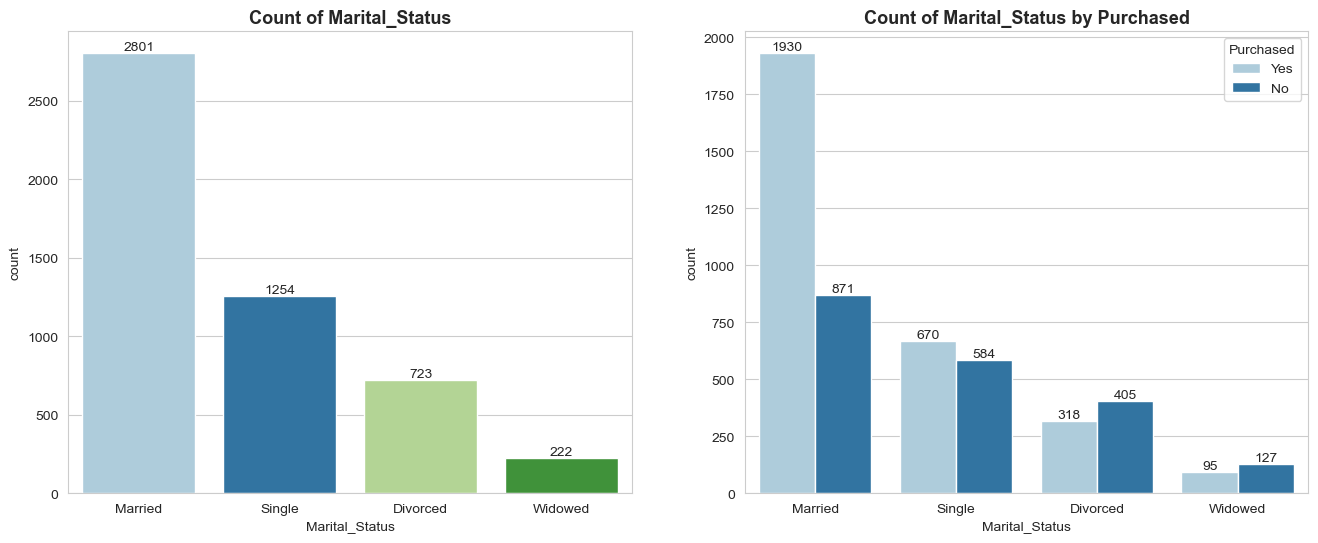

In [27]:
# Marital_Status

feature_count_plot('Marital_Status', 'Paired')

⭐ **Conclution:**
- Married people have higher purchase than others.

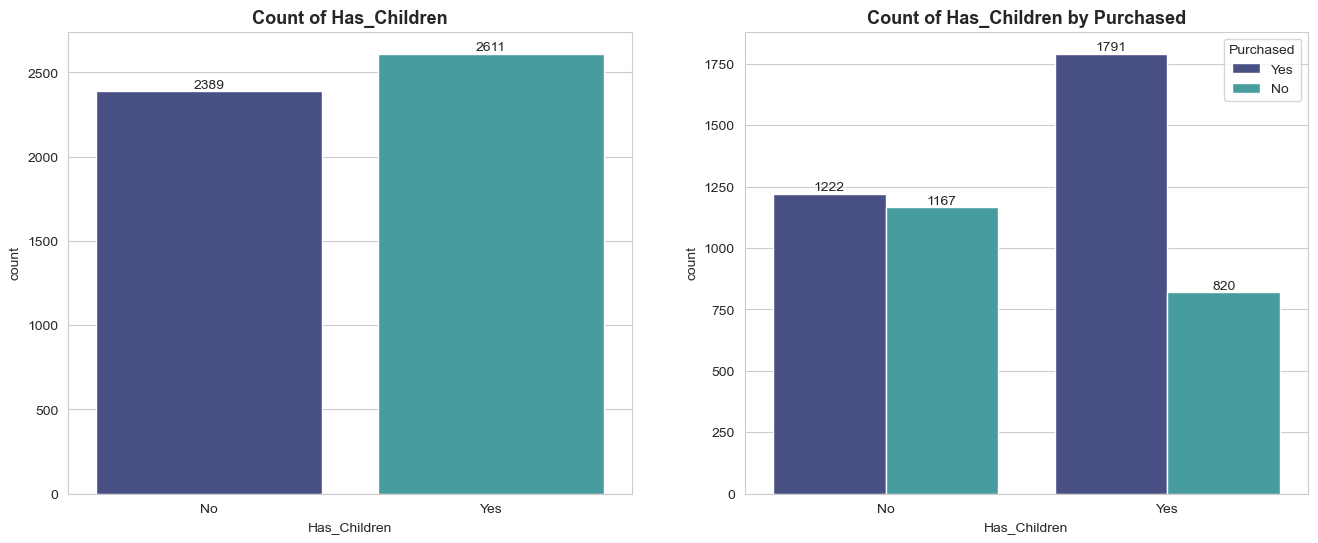

In [28]:
# Has_Children Feature

feature_count_plot('Has_Children', 'mako')

⭐ **Conclution:**
- Perchase probability is higher for the people with childern.

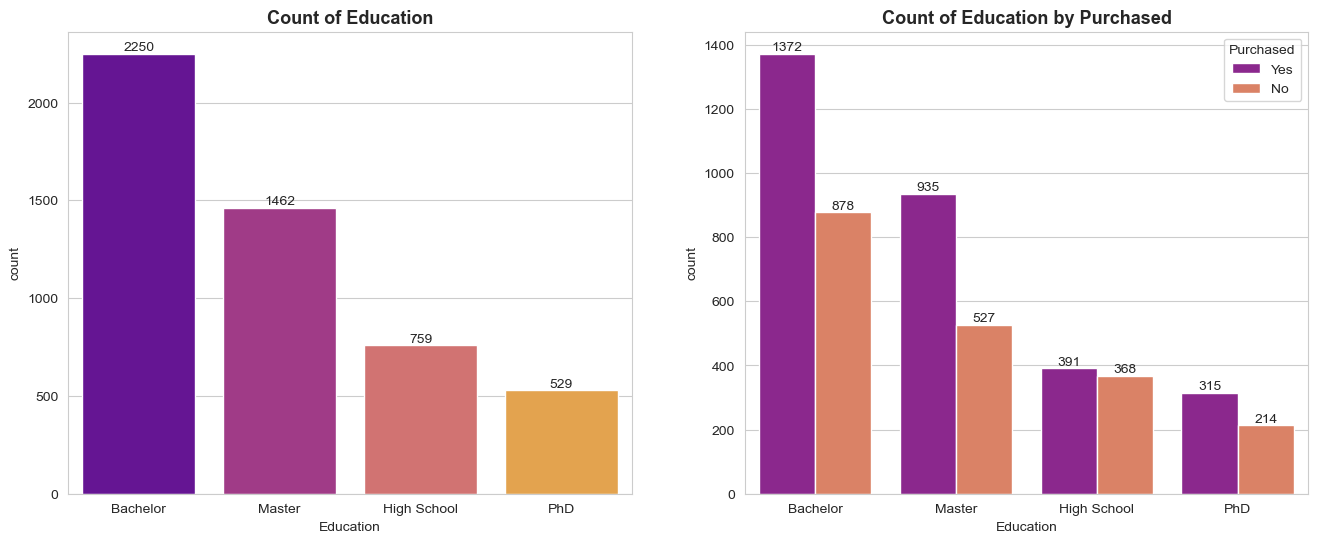

In [29]:
# Education Feature
feature_count_plot('Education', 'plasma')

⭐ **Conclution:**
- Bachelor and master has higher purchasing probability.

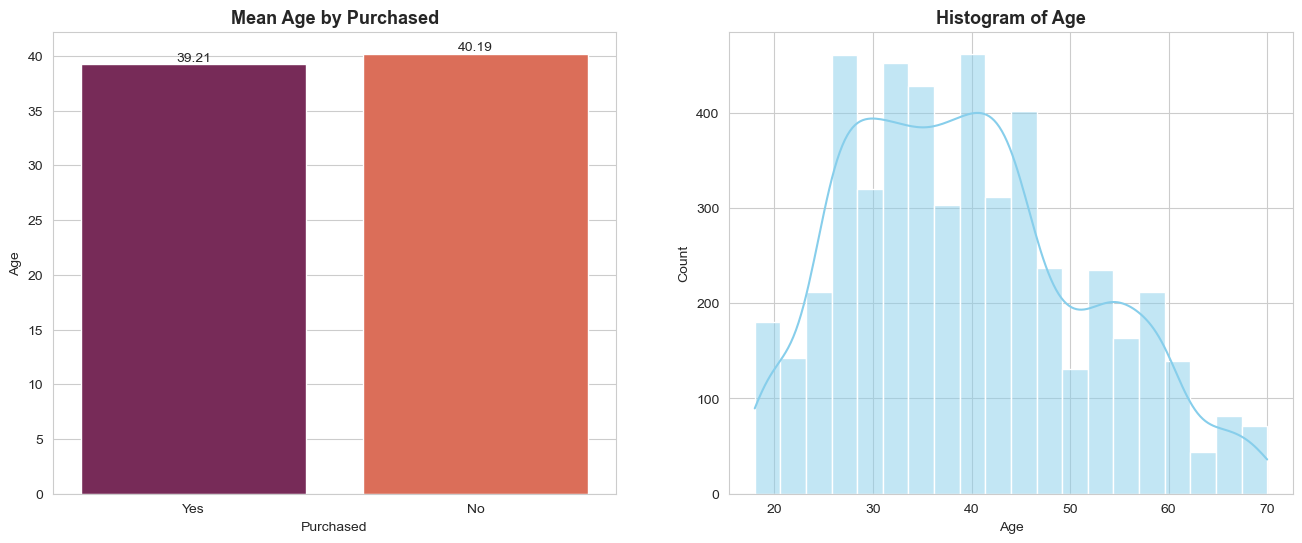

In [30]:
# Age feature
plt.figure(figsize=(16, 6))

plt.subplot(121)
ax = sns.barplot(data=df, x='Purchased', y='Age', ci=None, palette='rocket')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10)
    
plt.title('Mean Age by Purchased', fontsize=13, fontweight='bold')
    

plt.subplot(122)
sns.histplot(data=df, x='Age', color='skyblue', bins=20, kde=True)
plt.title('Histogram of Age', fontsize=13, fontweight='bold')

plt.show()

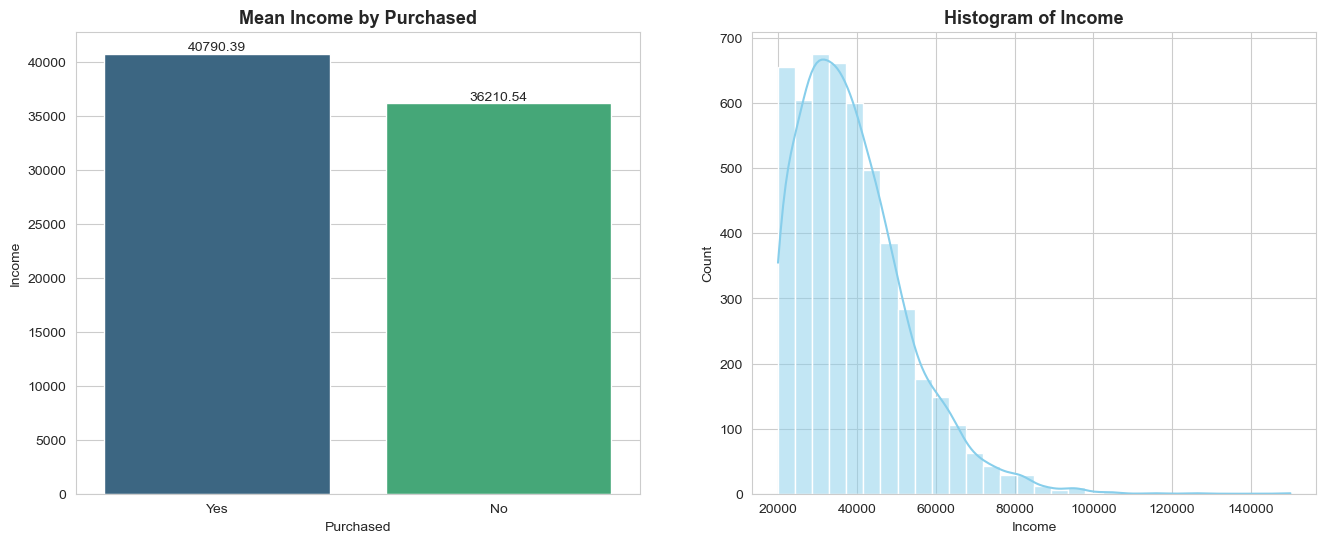

In [31]:
# Income feature
plt.figure(figsize=(16, 6))

plt.subplot(121)
ax = sns.barplot(data=df, x='Purchased', y='Income', ci=None, palette='viridis')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10)
    
plt.title('Mean Income by Purchased', fontsize=13, fontweight='bold')
    

plt.subplot(122)
sns.histplot(data=df, x='Income', color='skyblue', bins=30, kde=True)
plt.title('Histogram of Income', fontsize=13, fontweight='bold')

plt.show()

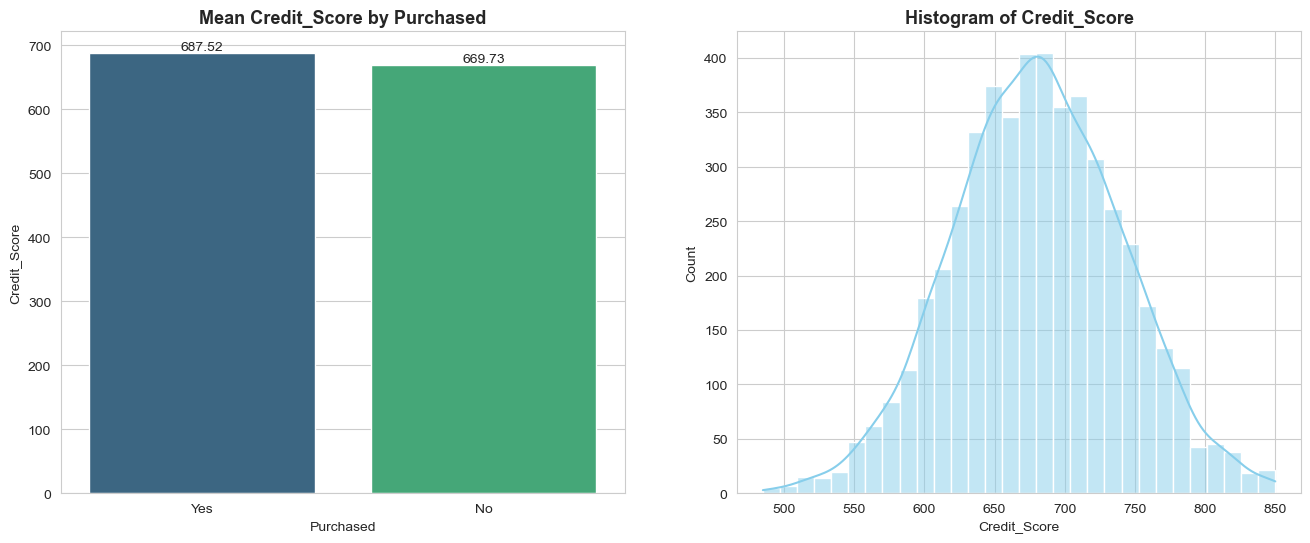

In [32]:
# Credit_Score feature
plt.figure(figsize=(16, 6))

plt.subplot(121)
ax = sns.barplot(data=df, x='Purchased', y='Credit_Score', ci=None, palette='viridis')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10)
    
plt.title('Mean Credit_Score by Purchased', fontsize=13, fontweight='bold')
    

plt.subplot(122)
sns.histplot(data=df, x='Credit_Score', color='skyblue', bins=30, kde=True)
plt.title('Histogram of Credit_Score', fontsize=13, fontweight='bold')

plt.show()

## 5. Feature engineering

In [33]:
null_credit

,Credit_Score,Purchased
64,NaN,No
173,NaN,No
588,NaN,Yes
809,NaN,No
1287,NaN,Yes
1363,NaN,No
1585,NaN,Yes
1614,NaN,Yes
1951,NaN,No
2121,NaN,No


In [34]:
null_age

,Age,Purchased
0,NaN,Yes
1,NaN,No
2,NaN,No
3,NaN,No
4,NaN,No
5,NaN,No
6,NaN,Yes
7,NaN,Yes
8,NaN,No
9,NaN,Yes


In [35]:
null_income

,Income,Purchased
1260,NaN,No
1376,NaN,Yes
1516,NaN,No
2706,NaN,Yes
3186,NaN,Yes
3767,NaN,No
4085,NaN,Yes


In [36]:
clean_df = df.dropna()
clean_df.head()

,Customer_ID,Gender,Age,Income,Car_Type,Marital_Status,Has_Children,Education,Credit_Score,Purchased
12,CUST10333,Female,52.0,56538.0,SUV,Married,Yes,High School,697.0,No
13,CUST12344,Male,55.0,56311.0,Truck,Divorced,No,Master,758.0,No
14,CUST11924,Male,30.0,23476.0,SUV,Married,No,Master,723.0,Yes
15,CUST10033,Female,38.0,43440.0,Luxury,Married,Yes,Bachelor,694.0,No
16,CUST13243,Female,33.0,39336.0,SUV,Single,No,Bachelor,678.0,Yes


In [37]:
df.shape

(5000, 10)

In [38]:
clean_df.shape

(4959, 10)

In [39]:
# clean_df.drop(['Customer_ID'], axis=1, inplace=True)
# clean_df.head()

In [40]:
df.shape

(5000, 10)

In [41]:
from sklearn.preprocessing import LabelEncoder

encoded_df = df.copy()

le = LabelEncoder()

for col in encoded_df.select_dtypes(include=['object']).columns:
    encoded_df[col] = le.fit_transform(encoded_df[col])
    
encoded_df.head()

,Customer_ID,Gender,Age,Income,Car_Type,Marital_Status,Has_Children,Education,Credit_Score,Purchased
0,4792,0,NaN,46207.0,3,1,0,0,655.0,1
1,3238,0,NaN,57772.0,4,1,1,0,630.0,0
2,2833,0,NaN,26054.0,1,2,0,2,516.0,0
3,3048,1,NaN,58508.0,0,2,1,2,667.0,0
4,3309,1,NaN,35518.0,2,0,0,2,661.0,0


In [42]:
encoded_df.shape

(5000, 10)

In [43]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=25)  
knn_imputed = knn_imputer.fit_transform(encoded_df)
knn_imputed

array([[4.792e+03, 0.000e+00, 3.440e+01, ..., 0.000e+00, 6.550e+02,
        1.000e+00],
       [3.238e+03, 0.000e+00, 3.708e+01, ..., 0.000e+00, 6.300e+02,
        0.000e+00],
       [2.833e+03, 0.000e+00, 4.308e+01, ..., 2.000e+00, 5.160e+02,
        0.000e+00],
       ...,
       [3.092e+03, 0.000e+00, 5.900e+01, ..., 0.000e+00, 7.600e+02,
        1.000e+00],
       [3.772e+03, 0.000e+00, 4.300e+01, ..., 1.000e+00, 6.060e+02,
        0.000e+00],
       [8.600e+02, 1.000e+00, 4.400e+01, ..., 0.000e+00, 6.090e+02,
        1.000e+00]])

In [44]:
df_knn = pd.DataFrame(knn_imputed, columns=encoded_df.columns)
df_knn.head()

,Customer_ID,Gender,Age,Income,Car_Type,Marital_Status,Has_Children,Education,Credit_Score,Purchased
0,4792.0,0.0,34.40,46207.0,3.0,1.0,0.0,0.0,655.0,1.0
1,3238.0,0.0,37.08,57772.0,4.0,1.0,1.0,0.0,630.0,0.0
2,2833.0,0.0,43.08,26054.0,1.0,2.0,0.0,2.0,516.0,0.0
3,3048.0,1.0,37.68,58508.0,0.0,2.0,1.0,2.0,667.0,0.0
4,3309.0,1.0,38.00,35518.0,2.0,0.0,0.0,2.0,661.0,0.0


In [45]:
df_knn.shape

(5000, 10)

# Copy before Bins

In [46]:
without_bins_df = df_knn.copy()
without_bins_df.shape

(5000, 10)

### 5.1 Coverting numerical features to categorical

In [47]:
# Coverting Age to Age_Group

# Create Age Groups
bins = [0, 29, 44, 54, 100] # Age range
labels = ["Youth", "Young_Adult", "Adult", "Senior"]  # Group names

df_knn["Age_Group"] = pd.cut(df_knn["Age"], bins=bins, labels=labels, right=True)

df_knn.head()

,Customer_ID,Gender,Age,Income,Car_Type,Marital_Status,Has_Children,Education,Credit_Score,Purchased,Age_Group
0,4792.0,0.0,34.40,46207.0,3.0,1.0,0.0,0.0,655.0,1.0,Young_Adult
1,3238.0,0.0,37.08,57772.0,4.0,1.0,1.0,0.0,630.0,0.0,Young_Adult
2,2833.0,0.0,43.08,26054.0,1.0,2.0,0.0,2.0,516.0,0.0,Young_Adult
3,3048.0,1.0,37.68,58508.0,0.0,2.0,1.0,2.0,667.0,0.0,Young_Adult
4,3309.0,1.0,38.00,35518.0,2.0,0.0,0.0,2.0,661.0,0.0,Young_Adult


In [48]:
df_knn.tail()

,Customer_ID,Gender,Age,Income,Car_Type,Marital_Status,Has_Children,Education,Credit_Score,Purchased,Age_Group
4995,4426.0,1.0,33.0,33529.0,0.0,1.0,0.0,2.0,537.0,1.0,Young_Adult
4996,466.0,1.0,49.0,47840.0,4.0,1.0,0.0,2.0,684.0,0.0,Adult
4997,3092.0,0.0,59.0,20000.0,0.0,1.0,0.0,0.0,760.0,1.0,Senior
4998,3772.0,0.0,43.0,50349.0,1.0,2.0,0.0,1.0,606.0,0.0,Young_Adult
4999,860.0,1.0,44.0,32073.0,2.0,1.0,1.0,0.0,609.0,1.0,Young_Adult


In [49]:
# Coverting Income to Income Level

# Create Income Levels
bins = [0, 40000, 60000, 90000, 200000] # Income range
labels = ["Low", "Medium", "High", "Very_High"]  # Level names

df_knn["Income_Level"] = pd.cut(df_knn["Income"], bins=bins, labels=labels, right=True)

df_knn.head()

,Customer_ID,Gender,Age,Income,Car_Type,Marital_Status,Has_Children,Education,Credit_Score,Purchased,Age_Group,Income_Level
0,4792.0,0.0,34.40,46207.0,3.0,1.0,0.0,0.0,655.0,1.0,Young_Adult,Medium
1,3238.0,0.0,37.08,57772.0,4.0,1.0,1.0,0.0,630.0,0.0,Young_Adult,Medium
2,2833.0,0.0,43.08,26054.0,1.0,2.0,0.0,2.0,516.0,0.0,Young_Adult,Low
3,3048.0,1.0,37.68,58508.0,0.0,2.0,1.0,2.0,667.0,0.0,Young_Adult,Medium
4,3309.0,1.0,38.00,35518.0,2.0,0.0,0.0,2.0,661.0,0.0,Young_Adult,Low


In [50]:
df_knn['Credit_Score'].min()

485.0

In [51]:
df_knn['Credit_Score'].max()

850.0

In [52]:
# Divide into 4 quantile bins
df_knn['Credit_Quantile'] = pd.qcut(df_knn['Credit_Score'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4']) #labels=['Q1', 'Q2', 'Q3', 'Q4']

print(df_knn[['Credit_Score', 'Credit_Quantile']].head(10))


   Credit_Score Credit_Quantile
0         655.0              Q2
1         630.0              Q1
2         516.0              Q1
3         667.0              Q2
4         661.0              Q2
5         732.0              Q4
6         756.0              Q4
7         756.0              Q4
8         693.0              Q3
9         612.0              Q1


In [53]:
df_knn.head()

,Customer_ID,Gender,Age,Income,Car_Type,Marital_Status,Has_Children,Education,Credit_Score,Purchased,Age_Group,Income_Level,Credit_Quantile
0,4792.0,0.0,34.40,46207.0,3.0,1.0,0.0,0.0,655.0,1.0,Young_Adult,Medium,Q2
1,3238.0,0.0,37.08,57772.0,4.0,1.0,1.0,0.0,630.0,0.0,Young_Adult,Medium,Q1
2,2833.0,0.0,43.08,26054.0,1.0,2.0,0.0,2.0,516.0,0.0,Young_Adult,Low,Q1
3,3048.0,1.0,37.68,58508.0,0.0,2.0,1.0,2.0,667.0,0.0,Young_Adult,Medium,Q2
4,3309.0,1.0,38.00,35518.0,2.0,0.0,0.0,2.0,661.0,0.0,Young_Adult,Low,Q2


# drop original numeric columns

In [54]:
final_df = df_knn.drop(['Customer_ID', 'Age', 'Income', 'Credit_Score','Income_Level'], axis=1)
final_df.head()

,Gender,Car_Type,Marital_Status,Has_Children,Education,Purchased,Age_Group,Credit_Quantile
0,0.0,3.0,1.0,0.0,0.0,1.0,Young_Adult,Q2
1,0.0,4.0,1.0,1.0,0.0,0.0,Young_Adult,Q1
2,0.0,1.0,2.0,0.0,2.0,0.0,Young_Adult,Q1
3,1.0,0.0,2.0,1.0,2.0,0.0,Young_Adult,Q2
4,1.0,2.0,0.0,0.0,2.0,0.0,Young_Adult,Q2


In [55]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Gender           5000 non-null   float64 
 1   Car_Type         5000 non-null   float64 
 2   Marital_Status   5000 non-null   float64 
 3   Has_Children     5000 non-null   float64 
 4   Education        5000 non-null   float64 
 5   Purchased        5000 non-null   float64 
 6   Age_Group        5000 non-null   category
 7   Credit_Quantile  5000 non-null   category
dtypes: category(2), float64(6)
memory usage: 244.7 KB


### 5.2 Encoding

In [56]:
for col in final_df.columns:
    if final_df[col].dtype == 'object' or final_df[col].dtype == 'category':
        final_df[col] = le.fit_transform(final_df[col]) # Updating the values

final_df.head()

,Gender,Car_Type,Marital_Status,Has_Children,Education,Purchased,Age_Group,Credit_Quantile
0,0.0,3.0,1.0,0.0,0.0,1.0,2,1
1,0.0,4.0,1.0,1.0,0.0,0.0,2,0
2,0.0,1.0,2.0,0.0,2.0,0.0,2,0
3,1.0,0.0,2.0,1.0,2.0,0.0,2,1
4,1.0,2.0,0.0,0.0,2.0,0.0,2,1


### 5.3 Separating features and target

In [57]:
# Features
x = final_df.drop('Purchased', axis=1)

# Target
y = final_df['Purchased']

print(x.shape)
print(y.shape)

(5000, 7)
(5000,)


## 6. Modeling

### 6.1 Spliting traing and testing data

In [58]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=42)

In [59]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(3750, 7)
(3750,)
(1250, 7)
(1250,)


### 6.2: Training the model

In [60]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [61]:
model.fit(xtrain, ytrain) # Training the model

DecisionTreeClassifier()

## 7. Testing

In [62]:
model.score(xtrain, ytrain) # Training Score

0.8445333333333334

In [63]:
model.score(xtest, ytest) # Testing Score

0.616

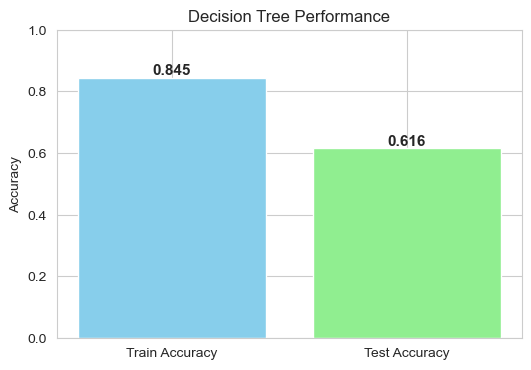

In [64]:
train_acc_dt = model.score(xtrain, ytrain)
test_acc_dt = model.score(xtest, ytest)

scores = [train_acc_dt, test_acc_dt]
labels = ['Train Accuracy', 'Test Accuracy']

plt.figure(figsize=(6,4))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen'])
plt.ylim(0,1)
plt.title("Decision Tree Performance")
plt.ylabel("Accuracy")

for bar, score in zip(bars, scores):
    plt.text(
        bar.get_x() + bar.get_width()/2,   
        bar.get_height(),                 
        f"{score:.3f}",                   
        ha='center', va='bottom', fontsize=11, fontweight='bold'
    )

plt.show()

⭐ **Conclution:**
- This is aoverfit model.
- Training score is higher than the testing data.

# without_bins_df

In [65]:
without_bins_df.head()

,Customer_ID,Gender,Age,Income,Car_Type,Marital_Status,Has_Children,Education,Credit_Score,Purchased
0,4792.0,0.0,34.40,46207.0,3.0,1.0,0.0,0.0,655.0,1.0
1,3238.0,0.0,37.08,57772.0,4.0,1.0,1.0,0.0,630.0,0.0
2,2833.0,0.0,43.08,26054.0,1.0,2.0,0.0,2.0,516.0,0.0
3,3048.0,1.0,37.68,58508.0,0.0,2.0,1.0,2.0,667.0,0.0
4,3309.0,1.0,38.00,35518.0,2.0,0.0,0.0,2.0,661.0,0.0


In [66]:
without_bins_x = without_bins_df.drop(['Purchased','Customer_ID','Gender'], axis=1)

# Target
without_bins_y = without_bins_df['Purchased']

print(without_bins_x.shape)
print(without_bins_y.shape)

(5000, 7)
(5000,)


In [67]:
without_bins_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             5000 non-null   float64
 1   Income          5000 non-null   float64
 2   Car_Type        5000 non-null   float64
 3   Marital_Status  5000 non-null   float64
 4   Has_Children    5000 non-null   float64
 5   Education       5000 non-null   float64
 6   Credit_Score    5000 non-null   float64
dtypes: float64(7)
memory usage: 273.6 KB


In [68]:
xtrain, xtest, ytrain, ytest = train_test_split(without_bins_x, without_bins_y, test_size=0.25, random_state=42)

# Tune

In [69]:
from scipy.stats import randint, loguniform
import numpy as np
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

In [70]:
param_distributions = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "max_depth": randint(2, 10),                  
    "min_samples_split": randint(2, 50),
    "min_samples_leaf": randint(1, 50),
    "min_weight_fraction_leaf": [0.0],
    "max_features": [None, "sqrt", "log2"],        # or randint(1, X.shape[1])
    "max_leaf_nodes": [None] + list(range(10, 201, 10)),
    "min_impurity_decrease": loguniform(1e-7, 1e-2),
    "class_weight": [None, "balanced"],
    "ccp_alpha": loguniform(1e-7, 1e-2)
}

In [71]:
param_distributions

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x13334c1c3d0>,
 'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x13335b073d0>,
 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x13335a9c370>,
 'min_weight_fraction_leaf': [0.0],
 'max_features': [None, 'sqrt', 'log2'],
 'max_leaf_nodes': [None,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190,
  200],
 'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x13335b07760>,
 'class_weight': [None, 'balanced'],
 'ccp_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x13335ab8340>}

In [72]:
rs = RandomizedSearchCV(
    estimator= tree.DecisionTreeClassifier(),
    param_distributions=param_distributions,
    n_iter=500,              
    scoring="roc_auc",     
    n_jobs=-1,
    cv=5,
    random_state=42,
    verbose=1
)

In [73]:
rs

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000013335AB8340>,
                                        'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000...
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000013335B07760>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000013335A9C370>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000013335B073D0>,
                                        'min_weight_fraction_leaf': [0.0],
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='roc_auc', verbose=1)

In [74]:
rs.fit(xtrain, ytrain)
print("Best AUC (CV):", rs.best_score_)
print("Best params:", rs.best_params_)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best AUC (CV): 0.7315036664279739
Best params: {'ccp_alpha': 0.00024374550058442522, 'class_weight': None, 'criterion': 'log_loss', 'max_depth': 8, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 7.986159964706933e-05, 'min_samples_leaf': 24, 'min_samples_split': 36, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}


In [75]:
from sklearn.metrics import classification_report, roc_auc_score

In [76]:
best_dt = rs.best_estimator_
print("Test AUC:", roc_auc_score(ytest, best_dt.predict_proba(xtest)[:,1]))
print(classification_report(ytest, best_dt.predict(xtest)))

Test AUC: 0.6971249761232675
              precision    recall  f1-score   support

         0.0       0.58      0.55      0.57       508
         1.0       0.70      0.72      0.71       742

    accuracy                           0.65      1250
   macro avg       0.64      0.64      0.64      1250
weighted avg       0.65      0.65      0.65      1250



# With Bins

In [77]:
df_knn.head()
df_knn_without_bins = df_knn.drop(['Age_Group','Income_Level','Credit_Quantile'], axis=1)
df_knn_without_bins

,Customer_ID,Gender,Age,Income,Car_Type,Marital_Status,Has_Children,Education,Credit_Score,Purchased
0,4792.0,0.0,34.40,46207.0,3.0,1.0,0.0,0.0,655.0,1.0
1,3238.0,0.0,37.08,57772.0,4.0,1.0,1.0,0.0,630.0,0.0
2,2833.0,0.0,43.08,26054.0,1.0,2.0,0.0,2.0,516.0,0.0
3,3048.0,1.0,37.68,58508.0,0.0,2.0,1.0,2.0,667.0,0.0
4,3309.0,1.0,38.00,35518.0,2.0,0.0,0.0,2.0,661.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4995,4426.0,1.0,33.00,33529.0,0.0,1.0,0.0,2.0,537.0,1.0
4996,466.0,1.0,49.00,47840.0,4.0,1.0,0.0,2.0,684.0,0.0
4997,3092.0,0.0,59.00,20000.0,0.0,1.0,0.0,0.0,760.0,1.0
4998,3772.0,0.0,43.00,50349.0,1.0,2.0,0.0,1.0,606.0,0.0


In [78]:
df_knn_without_bins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_ID     5000 non-null   float64
 1   Gender          5000 non-null   float64
 2   Age             5000 non-null   float64
 3   Income          5000 non-null   float64
 4   Car_Type        5000 non-null   float64
 5   Marital_Status  5000 non-null   float64
 6   Has_Children    5000 non-null   float64
 7   Education       5000 non-null   float64
 8   Credit_Score    5000 non-null   float64
 9   Purchased       5000 non-null   float64
dtypes: float64(10)
memory usage: 390.8 KB


In [79]:
xtrain, xtest, ytrain, ytest = train_test_split(df_knn_without_bins.drop(['Purchased','Customer_ID'], axis=1), df_knn_without_bins['Purchased'], test_size=0.30, random_state=42)

In [80]:
rs.fit(xtrain, ytrain)
print("Best AUC (CV):", rs.best_score_)
print("Best params:", rs.best_params_)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best AUC (CV): 0.7344843792726278
Best params: {'ccp_alpha': 0.00029995466148266043, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'max_leaf_nodes': 160, 'min_impurity_decrease': 0.00030112266469481554, 'min_samples_leaf': 31, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}


In [81]:
best_dt = rs.best_estimator_
print("Test AUC:", roc_auc_score(ytest, best_dt.predict_proba(xtest)[:,1]))
print(classification_report(ytest, best_dt.predict(xtest)))

Test AUC: 0.7188926872194682
              precision    recall  f1-score   support

         0.0       0.63      0.53      0.58       607
         1.0       0.71      0.79      0.75       893

    accuracy                           0.69      1500
   macro avg       0.67      0.66      0.66      1500
weighted avg       0.68      0.69      0.68      1500



In [82]:
best_dt.score(xtest, ytest)

0.686

In [83]:
best_dt.score(xtrain, ytrain)

0.7328571428571429

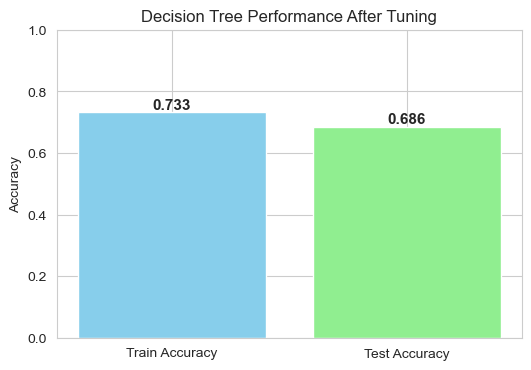

In [84]:
train_acc = best_dt.score(xtrain, ytrain)
test_acc = best_dt.score(xtest, ytest)

scores = [train_acc, test_acc]
labels = ['Train Accuracy', 'Test Accuracy']

plt.figure(figsize=(6,4))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen'])
plt.ylim(0,1)
plt.title("Decision Tree Performance After Tuning")
plt.ylabel("Accuracy")

for bar, score in zip(bars, scores):
    plt.text(
        bar.get_x() + bar.get_width()/2,   
        bar.get_height(),                 
        f"{score:.3f}",                   
        ha='center', va='bottom', fontsize=11, fontweight='bold'
    )

plt.show()

# XGBoost

In [85]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

xgb_model = XGBClassifier(
    n_estimators=51,
    learning_rate=0.01,
    max_depth=15,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb_model.fit(xtrain, ytrain)


train_acc = accuracy_score(ytrain, xgb_model.predict(xtrain))
test_acc = accuracy_score(ytest, xgb_model.predict(xtest))
auc = roc_auc_score(ytest, xgb_model.predict_proba(xtest)[:,1])

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("Test AUC:", auc)
print(classification_report(ytest, xgb_model.predict(xtest)))


Train Accuracy: 0.918
Test Accuracy: 0.6973333333333334
Test AUC: 0.7526026148831015
              precision    recall  f1-score   support

         0.0       0.66      0.51      0.58       607
         1.0       0.71      0.82      0.76       893

    accuracy                           0.70      1500
   macro avg       0.69      0.67      0.67      1500
weighted avg       0.69      0.70      0.69      1500



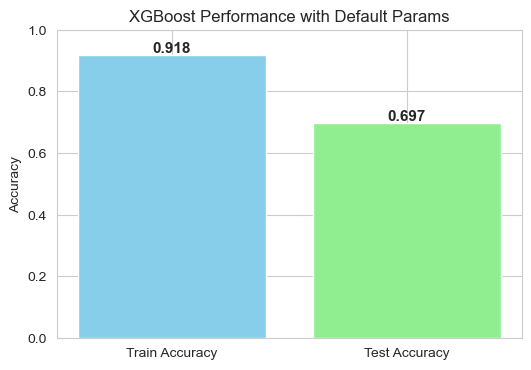

In [86]:
train_acc = xgb_model.score(xtrain, ytrain)
test_acc = xgb_model.score(xtest, ytest)

scores = [train_acc, test_acc]
labels = ['Train Accuracy', 'Test Accuracy']

plt.figure(figsize=(6,4))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen'])
plt.ylim(0,1)
plt.title("XGBoost Performance with Default Params")
plt.ylabel("Accuracy")

for bar, score in zip(bars, scores):
    plt.text(
        bar.get_x() + bar.get_width()/2,   
        bar.get_height(),                 
        f"{score:.3f}",                   
        ha='center', va='bottom', fontsize=11, fontweight='bold'
    )

plt.show()

# Tuning XGB

In [87]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from scipy.stats import randint, uniform, loguniform
from xgboost import XGBClassifier

neg, pos = np.bincount(ytrain)
scale_pos_weight = neg / pos if pos > 0 else 1.0

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

base = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    tree_method="hist",
    random_state=42,
    n_jobs=-1
)

In [88]:
param_dist = {
    "n_estimators": randint(300, 1200),
    "learning_rate": loguniform(1e-3, 3e-1),
    "max_depth": randint(3, 11),
    "min_child_weight": randint(1, 8),
    "subsample": uniform(0.6, 0.4),        # 0.6–1.0
    "colsample_bytree": uniform(0.6, 0.4), # 0.6–1.0
    "gamma": loguniform(1e-8, 1e-1),
    "reg_alpha": loguniform(1e-8, 1e-1),
    "reg_lambda": loguniform(1e-4, 10),
    "max_bin": randint(128, 512),
    "grow_policy": ["depthwise", "lossguide"],
    "scale_pos_weight": [1.0, scale_pos_weight]
}

rs = RandomizedSearchCV(
    estimator=base,
    param_distributions=param_dist,
    n_iter=150,              # increase if you have time
    scoring="roc_auc",
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rs.fit(xtrain, ytrain)
best_xgb = rs.best_estimator_


Fitting 5 folds for each of 150 candidates, totalling 750 fits


In [89]:
yprob = best_xgb.predict_proba(xtest)[:, 1]
ypred = (yprob >= 0.5).astype(int)
print("Best params:", rs.best_params_)
print("Test AUC:", roc_auc_score(ytest, yprob))
print("Test ACC:", accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

Best params: {'colsample_bytree': 0.6780971951192178, 'gamma': 0.0011406825736593987, 'grow_policy': 'depthwise', 'learning_rate': 0.02611702829999848, 'max_bin': 319, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 471, 'reg_alpha': 0.038300998004080336, 'reg_lambda': 5.883596555133606, 'scale_pos_weight': 1.0, 'subsample': 0.9533976089065036}
Test AUC: 0.7724679043115869
Test ACC: 0.7086666666666667
              precision    recall  f1-score   support

         0.0       0.68      0.54      0.60       607
         1.0       0.72      0.82      0.77       893

    accuracy                           0.71      1500
   macro avg       0.70      0.68      0.69      1500
weighted avg       0.70      0.71      0.70      1500



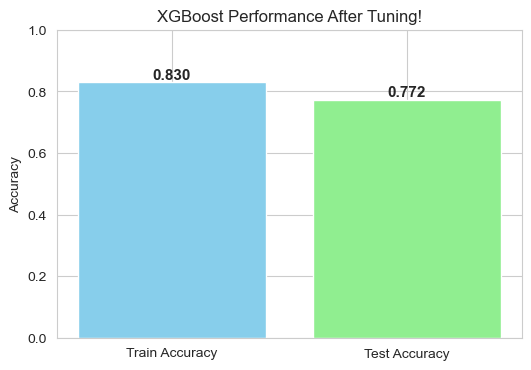

In [90]:
train_acc = rs.score(xtrain, ytrain)
test_acc = rs.score(xtest, ytest)

scores = [train_acc, test_acc]
labels = ['Train Accuracy', 'Test Accuracy']

plt.figure(figsize=(6,4))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen'])
plt.ylim(0,1)
plt.title("XGBoost Performance After Tuning!")
plt.ylabel("Accuracy")

for bar, score in zip(bars, scores):
    plt.text(
        bar.get_x() + bar.get_width()/2,   
        bar.get_height(),                 
        f"{score:.3f}",                   
        ha='center', va='bottom', fontsize=11, fontweight='bold'
    )

plt.show()

In [ ]:
bp = rs.best_params_
grid = {
    "max_depth": [max(3, bp["max_depth"]-1), bp["max_depth"], bp["max_depth"]+1],
    "min_child_weight": [max(1, bp["min_child_weight"]-1), bp["min_child_weight"], bp["min_child_weight"]+1],
    "subsample": [max(0.6, bp["subsample"]-0.1), bp["subsample"], min(1.0, bp["subsample"]+0.1)],
    "colsample_bytree": [max(0.6, bp["colsample_bytree"]-0.1), bp["colsample_bytree"], min(1.0, bp["colsample_bytree"]+0.1)],
    "learning_rate": [bp["learning_rate"]/2, bp["learning_rate"], bp["learning_rate"]*1.5],
    "gamma": [bp["gamma"]/3, bp["gamma"], bp["gamma"]*3],
    "reg_alpha": [bp["reg_alpha"]/3, bp["reg_alpha"], bp["reg_alpha"]*3],
    "reg_lambda": [bp["reg_lambda"]/3, bp["reg_lambda"], bp["reg_lambda"]*3],
    "n_estimators": [int(bp["n_estimators"]*0.8), bp["n_estimators"], int(bp["n_estimators"]*1.2)],
    "grow_policy": [bp["grow_policy"]],
    "max_bin": [bp["max_bin"]],
    "scale_pos_weight": [bp["scale_pos_weight"]],
}
gs = GridSearchCV(base, grid, scoring="roc_auc", cv=cv, n_jobs=-1, verbose=1)
gs.fit(xtrain, ytrain)
best_xgb = gs.best_estimator_

probably it will take 4/5 hours. 98415 fits

In [ ]:
yprob = best_xgb.predict_proba(xtest)[:, 1]
ypred = (yprob >= 0.5).astype(int)
print("Best params:", gs.best_params_)
print("Test AUC:", roc_auc_score(ytest, yprob))
print("Test ACC:", accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))